**1).Problem Statement:**Aerolift aims to increase its market reach and improve customer satisfaction across its product lines. However, with a diverse customer base spanning various demographics and preferences, it is unclear how different customer segments interact with each product. Understanding the characteristics, preferences, and purchasing patterns of Aerolift's customers is essential to align product offerings and marketing strategies effectively.

This analysis seeks to identify key factors that influence customer decisions, such as demographic traits, product preferences, and usage patterns. By uncovering these insights, Aerolift hopes to create targeted strategies that will better meet customer needs, optimize product positioning, and drive overall growth.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**1.1) Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

In [ ]:
df.shape

(180, 9)

In [ ]:
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**2. Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
## Non-Graphical Analysis:unique attributes and Value counts

df.head(),df.columns

(  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
 0   KP281   18    Male         14        Single      3        4   29562    112
 1   KP281   19    Male         15        Single      2        3   31836     75
 2   KP281   19  Female         14     Partnered      4        3   30699     66
 3   KP281   19    Male         12        Single      3        3   32973     85
 4   KP281   20    Male         13     Partnered      4        2   35247     47,
 Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
        'Fitness', 'Income', 'Miles'],
       dtype='object'))

In [ ]:
df['Product'].value_counts(),df['Gender'].value_counts(),df['Age'].value_counts(),df['Education'].value_counts(),df['MaritalStatus'].value_counts(),df['Usage'].value_counts(),df['Fitness'].value_counts(),df['Miles'].value_counts()

(Product
 KP281    80
 KP481    60
 KP781    40
 Name: count, dtype: int64,
 Gender
 Male      104
 Female     76
 Name: count, dtype: int64,
 Age
 25    25
 23    18
 24    12
 26    12
 28     9
 35     8
 33     8
 30     7
 38     7
 21     7
 22     7
 27     7
 31     6
 34     6
 29     6
 20     5
 40     5
 32     4
 19     4
 48     2
 37     2
 45     2
 47     2
 46     1
 50     1
 18     1
 44     1
 43     1
 41     1
 39     1
 36     1
 42     1
 Name: count, dtype: int64,
 Education
 16    85
 14    55
 18    23
 15     5
 13     5
 12     3
 21     3
 20     1
 Name: count, dtype: int64,
 MaritalStatus
 Partnered    107
 Single        73
 Name: count, dtype: int64,
 Usage
 3    69
 4    52
 2    33
 5    17
 6     7
 7     2
 Name: count, dtype: int64,
 Fitness
 3    97
 5    31
 2    26
 4    24
 1     2
 Name: count, dtype: int64,
 Miles
 85     27
 95     12
 66     10
 75     10
 47      9
 106     9
 94      8
 113     8
 53      7
 100     7
 180     6
 200    

**3. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

In [ ]:
df1=pd.DataFrame(df['Age'])
bins = [0, 10, 20, 30, 40,50,60]
labels = ['0-10', '10-20', '20-30', '30-40','40-50','50-60']
df['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels)

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group
0,KP281,18,Male,14,Single,3,4,29562,112,10-20
1,KP281,19,Male,15,Single,2,3,31836,75,10-20
2,KP281,19,Female,14,Partnered,4,3,30699,66,10-20
3,KP281,19,Male,12,Single,3,3,32973,85,10-20
4,KP281,20,Male,13,Partnered,4,2,35247,47,10-20
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,30-40
176,KP781,42,Male,18,Single,5,4,89641,200,40-50
177,KP781,45,Male,16,Single,5,5,90886,160,40-50
178,KP781,47,Male,18,Partnered,4,5,104581,120,40-50


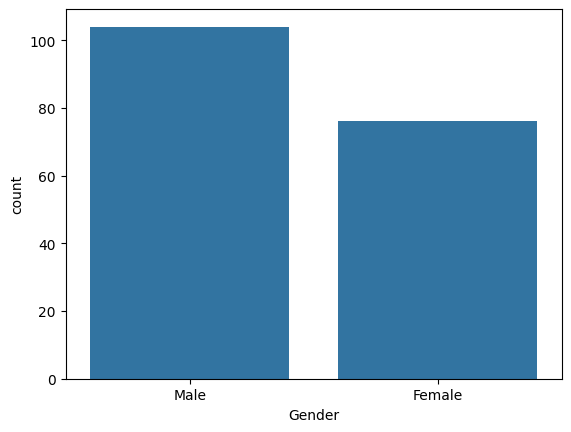

In [ ]:
sns.countplot(x='Gender',data=df)
plt.show()

**Ananlysis based on Fitness**

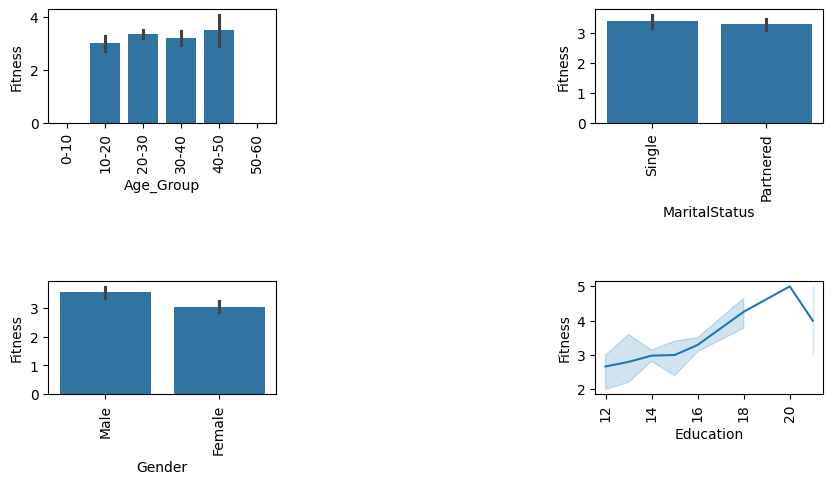

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(3,3,1)
sns.barplot(x='Age_Group',y='Fitness',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.barplot(x='MaritalStatus',y='Fitness',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.barplot(x='Gender',y='Fitness',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,9)
sns.lineplot(x='Education',y='Fitness',data=df)
plt.xticks(rotation=90)
plt.show()


**Analysis on Income**

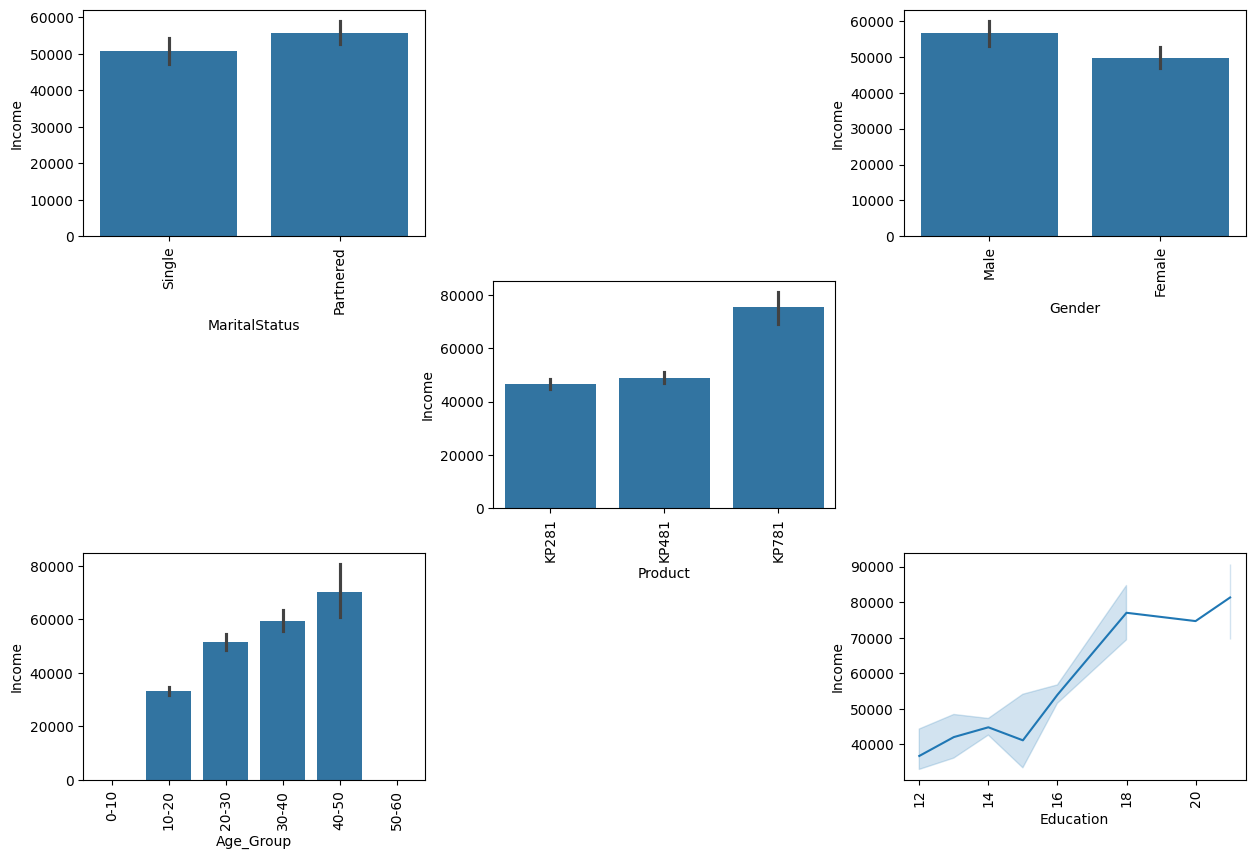

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.barplot(x='MaritalStatus',y='Income',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.barplot(x='Gender',y='Income',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.barplot(x='Age_Group',y='Income',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,9)
sns.lineplot(x='Education',y='Income',data=df)
plt.xticks(rotation=90)
plt.subplot(3,3,5)
sns.barplot(x='Product',y='Income',data=df)
plt.xticks(rotation=90)

plt.show()



Analysis Based on Miles

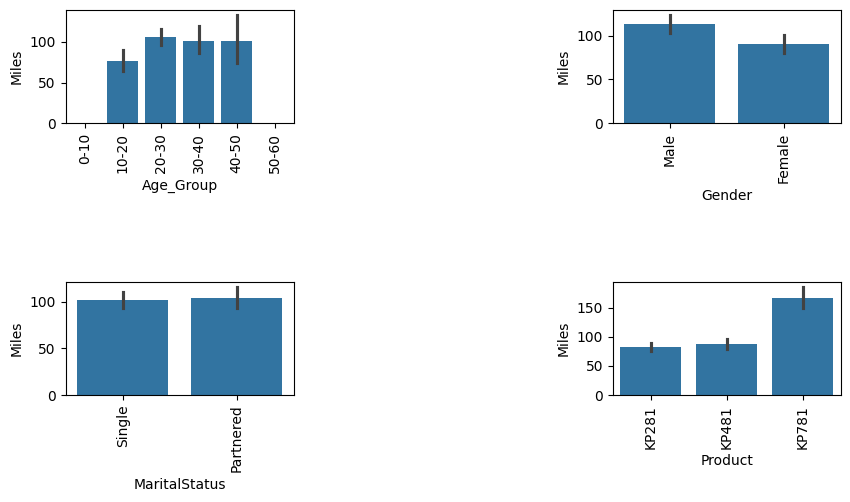

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(3,3,1)
sns.barplot(data=df,x='Age_Group',y='Miles')
plt.xticks(rotation=90)
plt.subplot(3,3,3)
sns.barplot(data=df,x='Gender',y='Miles')
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.barplot(data=df,x='MaritalStatus',y='Miles')
plt.xticks(rotation=90)
plt.subplot(3,3,9)
sns.barplot(data=df,x='Product',y='Miles')
plt.xticks(rotation=90)
plt.show()

**Analysis based on Usage**

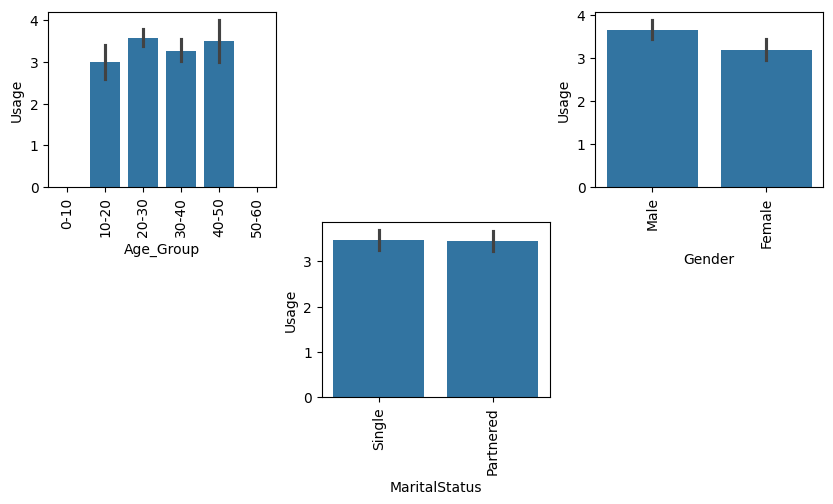

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(2,3,1)
sns.barplot(data=df,x='Age_Group',y='Usage')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(data=df,x='Gender',y='Usage')
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.barplot(data=df,x='MaritalStatus',y='Usage')
plt.xticks(rotation=90)
plt.show()

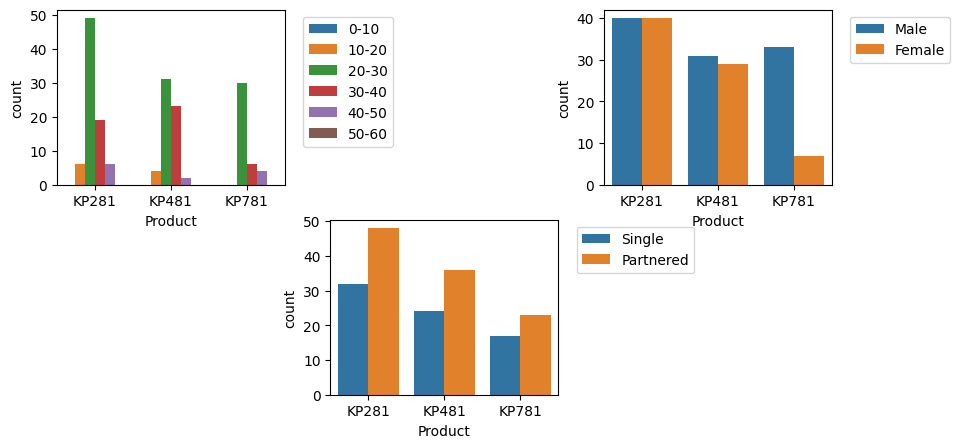

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(2,3,1)
sns.countplot(x='Product',data=df,hue='Age_Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(2,3,3)
sns.countplot(x='Product',data=df,hue='Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(2,3,5)
sns.countplot(x='Product',data=df,hue='MaritalStatus')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#

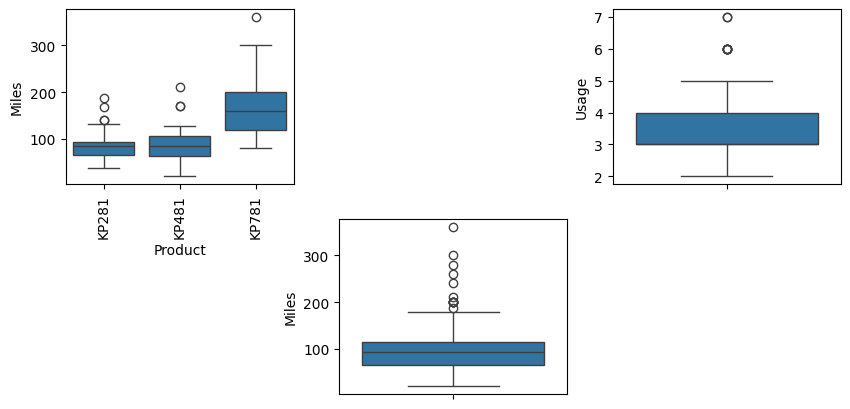

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(2,3,1)
sns.boxplot(x='Product',y='Miles',data=df)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.boxplot(data=df,y='Usage')
plt.subplot(2,3,5)
sns.boxplot(data=df,y='Miles')
plt.show()

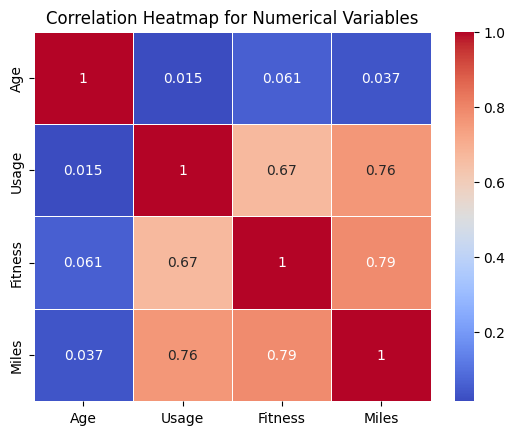

In [ ]:
df2=df[['Age','Usage','Fitness','Miles']]
corr_matrix=df2[['Age','Usage','Fitness','Miles']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


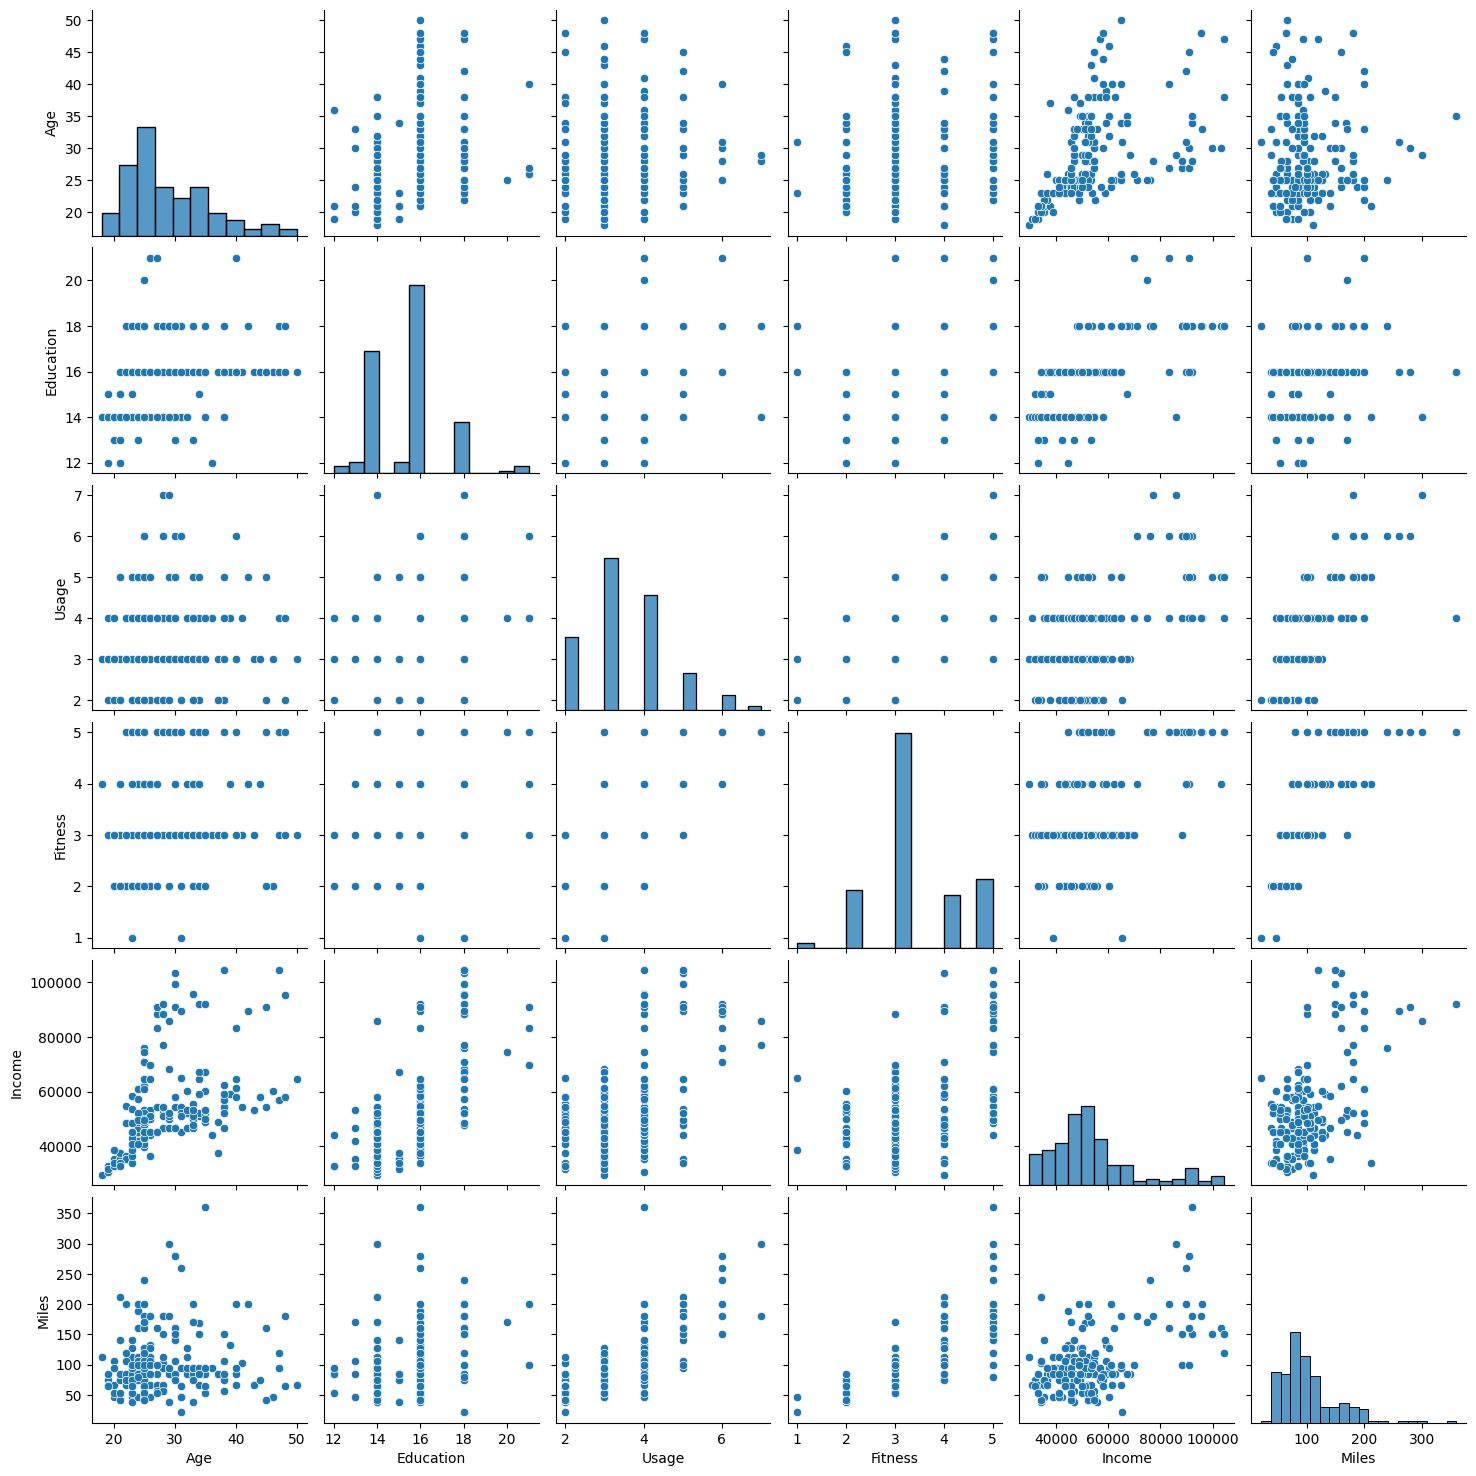

In [ ]:
sns.pairplot(df)
plt.show()

**4).Outlier detection**

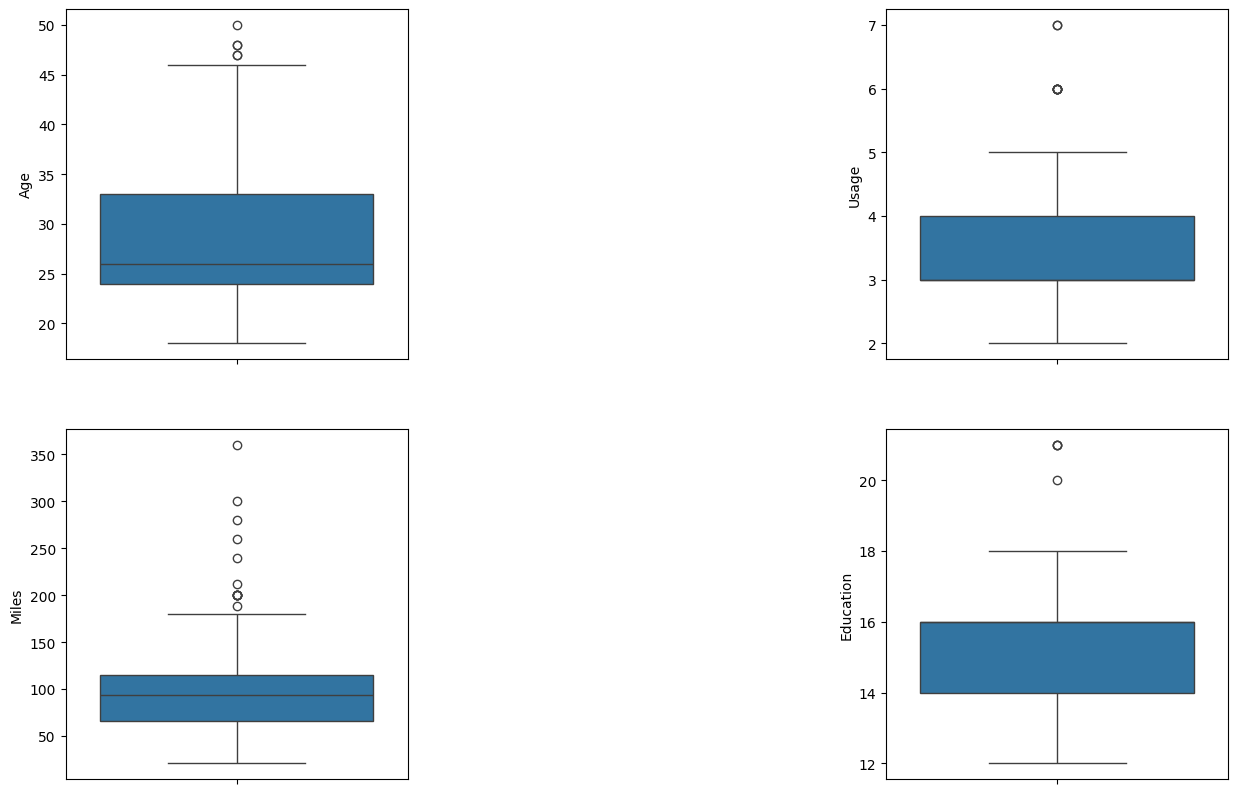

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.boxplot(y='Age',data=df)
plt.subplot(2,3,3)
sns.boxplot(y='Usage',data=df)
plt.subplot(2,3,4)
sns.boxplot(y='Miles',data=df)
plt.subplot(2,3,6)
sns.boxplot(y='Education',data=df)
plt.show()

**Marginal Probability for Gender vs Product**

In [ ]:
contingency_product_gender = pd.crosstab(df['Product'], df['Gender'], margins=True)
marginal_product_gender = np.round(pd.crosstab(df['Product'], df['Gender'], margins=True, normalize=True),3)
marginal_product_gender




Gender,Female,Male,All
Product,,,
KP281,0.222,0.222,0.444
KP481,0.161,0.172,0.333
KP781,0.039,0.183,0.222
All,0.422,0.578,1.000


**Conditional Probability for Gender vs Product**

In [ ]:
contingency_table = pd.crosstab(df['Product'], df['Gender'])
conditional_gender_given_product = np.round(contingency_table.div(contingency_table.sum(axis=1), axis=0),3)
conditional_gender_given_product

Gender,Female,Male
Product,,
KP281,0.500,0.500
KP481,0.483,0.517
KP781,0.175,0.825


**Marginal Probability for product vs marital status**

In [ ]:
contingency_product_ms = pd.crosstab(df['Product'], df['MaritalStatus'], margins=True)
marginal_product_ms = np.round(pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize=True),3)
marginal_product_ms

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.267,0.178,0.444
KP481,0.200,0.133,0.333
KP781,0.128,0.094,0.222
All,0.594,0.406,1.000


**Conditional Probability for product vs marital status**

In [ ]:
contingency_table2 = pd.crosstab(df['Product'], df['MaritalStatus'])
conditional_ms_given_product = np.round(contingency_table2.div(contingency_table2.sum(axis=1), axis=0),3)
conditional_ms_given_product

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


**Marginal Probability for product vs marital status vs gender**

In [ ]:
contingency_product_gender_marital = pd.crosstab(index=[df['Product'], df['Gender']], columns=df['MaritalStatus'], margins=True)
marginal_product_ms_gender=np.round(pd.crosstab(index=[df['Product'], df['Gender']], columns=df['MaritalStatus'], margins=True, normalize=True),3)
marginal_product_ms_gender


MaritalStatus   Partnered  Single    All
Product Gender                          
KP281   Female      0.150   0.072  0.222
        Male        0.117   0.106  0.222
KP481   Female      0.083   0.078  0.161
        Male        0.117   0.056  0.172
KP781   Female      0.022   0.017  0.039
        Male        0.106   0.078  0.183
All                 0.594   0.406  1.000

**Conditional Probability for product vs marital status vs gender**

In [ ]:
contingency_table3= pd.crosstab(index=[df['Product'], df['Gender']], columns=df['MaritalStatus'])
conditional_ms_gender_given_product = np.round(contingency_table3.div(contingency_table3.sum(axis=1), axis=0),3)
conditional_ms_gender_given_product

MaritalStatus   Partnered  Single
Product Gender                   
KP281   Female      0.675   0.325
        Male        0.525   0.475
KP481   Female      0.517   0.483
        Male        0.677   0.323
KP781   Female      0.571   0.429
        Male        0.576   0.424

In [ ]:
marginal_product=np.round(pd.crosstab(index=df['Product'], columns='count', margins=True, normalize=True),3)

col_0,count,All
Product,,
KP281,0.444,0.444
KP481,0.333,0.333
KP781,0.222,0.222
All,1.000,1.000


**Customer Profiling**

1).KP281 product is economical hence customers with less income prefers KP281 product.

2).The age group between 20-30 has extenstisvely bought KP281 product followed by 30-40.

3).Both male and female equally contribute for the toatal sales of KP281 product.

**KP481 Product**

1).KP481 is a mid range product hence customers with average income prefers this prodiuct.

2).Males who are partnered has contributed more to the total sales of the KP481 product.

3).The age group between 20-30 has extenstisvely bought KP281 product followed by 30-40.

**KP781 Product**

1).KP781 is a high-end product hence customers with high income will prefere this product.

2).The male customers who are partnered will contribute more toward the overall sales of KP781 product.

3).The age group between 20-30 has extenstisvely bought KP281 product followed by 30-40.

*   **Overall the cutomers who have less income and single prefer KP281 product, the customers who are partnered will prefer KP481 product , the male customers with high income will prefer KP781 product.**

*   **The age group of 20-30 has the highest sales contribution among all customer age groups**



In [ ]:
descriptive_stats = df.describe()
descriptive_stats


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**5.1).Comments on the range of attributes**

*   **Age:** Ranges from 18 to 50, with a mean age of about 28.8 years.

*   **Education:** Ranges from 12 to 21 years of education, with an average of 15.6 years.

*   **Usage:** The treadmill is used between 2 to 7 times per week, with an average of 3.5.

*   **Fitness:** Self-reported fitness levels range from 1 to 5, with a mean of 3.3.


*   **Income:** Ranges from $29,562 to $104,581, with an average income of around $53,720.


*   **Miles:** Distance run on the treadmill ranges from 21 to 360 miles, with an average of 103 miles.




**5.2).Comments on the distribution of the variables and relationship between them**



*   **Age:** Skewed toward younger individuals, with most customers likely being in their 20s and 30s.

*   **Education:** The education level is relatively high, with most people having between 14 and 16 years of education.

*   **Usage & Fitness:** The majority of users report using the treadmill 3 to 4 times a week and rate their fitness levels between 3 and 4.

*   **Income:** Income distribution is somewhat broad but centers around $50,000–$60,000.


*   **Miles:** Most customers run between 66 and 114 miles, with a few outliers running significantly more (up to 360 miles




**Relationship Between Variables:**

*   **Usage & Fitness:** A high correlation (0.67) suggests that customers who use the treadmill more frequently also report higher fitness levels.

*   **Education & Income:** There is a strong positive correlation (0.63) between education and income.


*   **Miles & Fitness/Usage:** Strong correlations (0.79 with fitness, 0.76 with usage) indicate that those who rate themselves as more fit and use the treadmill more frequently also run more miles.




**5.3).** **Comments for each univariate and bivariate plot**



1).The count plot for the gender shows that males have contributed more towards the overall sales.


**Bivariate Analysis based on Fitness:**



*   The age group between 40-50 rated themself higher in fitness followed by 20-30 age group.

*  Customers who are single rated themself higher compared to the custometrs who are  partnered.

*   Male customers rated themslef higher compared to the female customers.


*   When the liplot is plotted for fitness vs education , it is observed that fitness rating increased with increase in education.

**Bivariate Analysis based on Income:**



*   The Bivariate analysis from icome vs maritalstatus show that partnered custometrs have higher income compared to the customers who are single.

*   The Bivariate analysis from icome vs gender show that male customers have higher income compared to the female customers.


*   The Bivariate analysis from product vs income shows thats customers with higher income prefer higher end product and customers with less income prefers lower end product.
*   The age group between 40-50 has higher income compared to other age group customers


*   The Bivariate analysis from education vs income shows customers with higer education will earn higher income.


**Bivariate analysis based on miles:**



*   The bivariate analysis from age group vs miles shows customers in age group 20-30 walk more miles followed by 40-50 age group.



*   The bivariate analysis from gender vs miles shows male customers walk more miles compared to female customers

*   Both single and partnered will walk equally.


*  The customers who bought KP781 product will walk more miles compared to the cutomers who bought KP481 anf KP281 products.


**Bivariate analysis based on usage:**



*   The age group between 20-30 usage is high follwed by 40-50 age group
*   Male customer usage is more compared to female customers.
*   Single and partnered usage is almost same.


**Analysis based on HeatMap:**

From the heat map drwan between numerical variables we can observe that , **finess and miles(0.79)** are highly correlated followed by **usage and miles(0.76)** and **usage and fitness(0.67)**.









**6).Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand**



*   **Promote High-End Products to High-Income Segments:** Focus marketing efforts for high-end models like KP781 towards high-income customers. Emphasize the product's premium features and benefits.

*   **Target Age 20-30 for All Products:** Since the 20-30 age group has the highest purchase rate, design campaigns that appeal specifically to this demographic across all product lines.

*   **Create Gender-Specific Campaigns for KP781:** Since KP781 buyers are predominantly male, tailor ads or product information that addresses male customers’ fitness and status goals.

*   **Offer Bundles for Partnered Customers:** Since partnered customers tend to buy mid-range and high-end products, offer bundle deals or special partner benefits to increase engagement.

*   **Highlight Fitness Benefits:** Market the products based on fitness improvements since higher fitness levels correlate with frequent product use. Showcase testimonials and fitness progress stories.

*   **Design Promotions Around Marital Status:** Consider offering discounts for single individuals on the KP281 model, which they tend to prefer, while offering loyalty rewards for partnered customers who show more interest in mid-range models.


*   **Develop Income-Based Financing Options:** Offer flexible payment options for high-end models, enabling more customers from diverse income levels to purchase these products.


*   **Age-Based Product Recommendations:** Provide personalized product recommendations to customers based on age, as purchasing behavior varies significantly between age groups.


*   **Encourage Frequent Use:** Since increased treadmill usage correlates with higher customer satisfaction, provide fitness challenges or milestones for customers to keep them engaged.


*   **Promote Education-Based Benefits:** As higher education levels correlate with a preference for higher-end products, focus on informational content for educated customers highlighting product quality and advanced features.



**insights based on the conditional and marginal probabilities calculated in the analysis:**

**Gender Preference Across Products:**



*   Males have a higher likelihood of purchasing the high-end product, KP781, compared to females (conditional probability shows KP781 is preferred by males at a rate of 82.5%).

*   Both genders equally purchase KP281 and KP481, indicating these products appeal broadly and can be marketed without heavy gender-specific targeting.


**Product Popularity by Marital Status:**


*   KP281 and KP481 are preferred by partnered customers at a rate of 60%, while KP781 shows a similar trend with 57.5% partnered buyers. Partnered customers are more likely to purchase any product, indicating a potential market bias towards partnered individuals for all models.




**Product Choice Based on Income:**



*   KP281, an economical model, is preferred by customers with lower income, as shown by its higher marginal probability among this demographic. KP781, the high-end model, is favored by higher-income customers, supporting a clear segmentation by income for product positioning.

**Impact of Marital Status and Gender on High-End Product (KP781):**


*   Male and partnered customers are more likely to choose KP781. The probability analysis suggests that male, partnered individuals represent a primary customer base for high-end models, which can inform targeted campaigns for this demographic.




**Gender and Marital Status Combined Influence on KP281:**



*   Single individuals, regardless of gender, show a stronger preference for the budget model KP281. This suggests single individuals prioritize affordability, making KP281 a preferred choice among this group.



**Overall Purchase Patterns:**



*   Partnered individuals contribute 59.4% of total sales across all products, showing they have a higher purchase frequency. Aerolift can consider tailored promotions or loyalty programs for partnered customers to sustain this purchasing trend.




**Broad Appeal of KP281:**



*   KP281 has a nearly equal purchase distribution across male and female customers (each contributing about 22% to overall sales), indicating it is Aerolift's most universally appealing model. This product may not require significant demographic-specific marketing.





**Single vs. Partnered Probability by Product:**


*   Both single and partnered customers have nearly the same likelihood of buying KP281 and KP481, indicating these products appeal equally across marital statuses, though KP781 is more appealing to partnered individuals.





**Probability Insight for Cross-Selling Opportunities:**



*   Since KP481 has a strong preference among partnered males, there is an opportunity to cross-sell higher-end models to partnered customers who initially purchase KP481.




**Distribution by Demographic Segmentation:**



*   The marginal and conditional probability distributions by demographic data show that strategic segmentation by income, marital status, and gender for each product line can optimize marketing resources and focus on high-return customer groups.



